<a href="https://colab.research.google.com/github/fangya18/Data-science/blob/master/L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# authenticate Bigquery and Google Drive
from google.colab import auth
auth.authenticate_user()

# mount your drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
cd drive/MyDrive/HU/lymphoma/

/content/drive/MyDrive/HU/lymphoma


In [ ]:

df = pd.read_csv('LP1.csv')
df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT03415399,Clinical Study of ET190L1 ARTEMIS™ in Relapsed...,NaN,Completed,No Results Available,"Lymphoma, B-Cell",Biological: ET190L1 ARTEMIS™ T cells,Maximum Tolerated Dose|Toxicity profile of ET1...,Eureka Therapeutics Inc.|Peking University,...,ETCH17CD19AR103,"September 9, 2017","December 31, 2020","December 31, 2020","January 30, 2018",NaN,"March 16, 2021","Peking University Cancer Hospital, Beijing, China",NaN,https://ClinicalTrials.gov/show/NCT03415399
1,2,NCT01334502,"Everolimus, Rituximab, and Combination Chemoth...",NaN,Completed,No Results Available,Lymphoma,Biological: rituximab|Drug: cyclophosphamide|D...,MTD of everolimus in combination with R-CHOP|A...,Alliance for Clinical Trials in Oncology|Natio...,...,NCCTG-N1085|CDR0000698584|NCI-2011-02643,March 2012,February 2015,August 2017,"April 13, 2011",NaN,"August 10, 2017","Mayo Clinic Cancer Center, Rochester, Minnesot...",NaN,https://ClinicalTrials.gov/show/NCT01334502
2,3,NCT03039114,Study Evaluating Safety and Efficacy of INCB05...,NaN,Completed,No Results Available,Lymphoma,Drug: Parsaclisib|Drug: Hexal|Drug: Gazyvaro,Safety and tolerability of parsaclisib in comb...,Incyte Corporation,...,INCB 50465-102 (CITADEL-102)|Parsaclisib,"February 15, 2017","March 30, 2021","March 30, 2021","February 1, 2017",NaN,"December 2, 2021","Banner Health, Gilbert, Arizona, United States...",NaN,https://ClinicalTrials.gov/show/NCT03039114
3,4,NCT04103905,A Study of MIL62 in Treatment of CD20 Positive...,NaN,Completed,No Results Available,CD20-positive B Cell Non-Hodgkin Lymphoma,Drug: Recombinant Humanized Monoclonal Antibod...,Percentage of Participants Who Experienced a D...,"Beijing Mabworks Biotech Co., Ltd.",...,MIL62-CT01,"February 10, 2017","May 30, 2019","May 29, 2020","September 26, 2019",NaN,"June 16, 2021",Chinese Academy of Medical Sciences (CAMS) & P...,NaN,https://ClinicalTrials.gov/show/NCT04103905
4,5,NCT02741388,A Phase Ib Study of Oral Selinexor in Adult Pa...,SELINDA,Completed,No Results Available,B-cell Lymphoma,Drug: selinexor|Drug: Rituximab|Drug: Dexameth...,Incidence rate of dose-limiting toxicities (DL...,The Lymphoma Academic Research Organisation|Ka...,...,SELINDA,October 2016,"September 29, 2021","September 29, 2021","April 18, 2016",NaN,"December 7, 2021","Institut Jules Bordet, Bruxelles, Belgium|CHU ...",NaN,https://ClinicalTrials.gov/show/NCT02741388


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df[['start date','completion date']] = df[['start date','completion date']].apply(pd.to_datetime)
df['duration'] = (df['completion date'] - df['start date']).dt.days

In [ ]:
df.columns

Index(['rank', 'nct number', 'title', 'acronym', 'status', 'study results',
       'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration'],
      dtype='object')

In [ ]:
df1= df[['duration','gender','age','enrollment','sponsor/collaborators']]
df1['sponsor/collaborators']=df['sponsor/collaborators'].str.lower()
df1['age']=df['age'].str.lower()
df1.head()

<ipython-input-54-f0308fcf2a1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sponsor/collaborators']=df['sponsor/collaborators'].str.lower()
<ipython-input-54-f0308fcf2a1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age']=df['age'].str.lower()


,duration,gender,age,enrollment,sponsor/collaborators
0,1209.0,All,"18 years and older (adult, older adult)",4.0,eureka therapeutics inc.|peking university
1,1979.0,All,"18 years and older (adult, older adult)",26.0,alliance for clinical trials in oncology|natio...
2,1504.0,All,"18 years and older (adult, older adult)",26.0,incyte corporation
3,1204.0,All,"18 years and older (adult, older adult)",27.0,"beijing mabworks biotech co., ltd."
4,1824.0,All,"18 years to 70 years (adult, older adult)",39.0,the lymphoma academic research organisation|ka...


In [ ]:
# Cut Level for duration
dcat=pd.cut(df1.duration, bins=[0,366,732,1100,3000],
             labels=["a1year", "a2year" ,"a3year", "m3year"])
df1.insert(5, "Dcat", dcat)


In [ ]:
df1['ecat']= np.where(df1['enrollment']<50, 'Less50','Greater50')

<ipython-input-27-de0aa5b3d4e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ecat']= np.where(df1['enrollment']<50, 'Less50','Greater50')


In [ ]:
df1.head()

,duration,gender,age,enrollment,sponsor/collaborators,Dcat,ecat
0,1209.0,All,"18 Years and older (Adult, Older Adult)",4.0,Eureka Therapeutics Inc.|Peking University,m3year,Less50
1,1979.0,All,"18 Years and older (Adult, Older Adult)",26.0,Alliance for Clinical Trials in Oncology|Natio...,m3year,Less50
2,1504.0,All,"18 Years and older (Adult, Older Adult)",26.0,Incyte Corporation,m3year,Less50
3,1204.0,All,"18 Years and older (Adult, Older Adult)",27.0,"Beijing Mabworks Biotech Co., Ltd.",m3year,Less50
4,1824.0,All,"18 Years to 70 Years (Adult, Older Adult)",39.0,The Lymphoma Academic Research Organisation|Ka...,m3year,Less50


## Enrollement vs Duration
1. patients =<50
2. patients >50

* It makes a difference

In [ ]:
fig=plt.figure()
def fplot(var,label):
    fig, ax=plt.subplots(1,4)
    sns.violinplot(x=var, y="duration",data=df1,palette="Set2",ax=ax[0])
    sns.histplot(df1,x="duration", hue=var, palette="Set2",kde=True,ax=ax[1])
    sns.countplot(x=var,hue="Dcat",data=df1,palette="Set2", ax=ax[2])
    sns.barplot(x=var , y="duration",palette="Set2", data=df1,ax=ax[3])
    plt.suptitle(label)
    return plt
fig.show()

<Figure size 640x480 with 0 Axes>

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

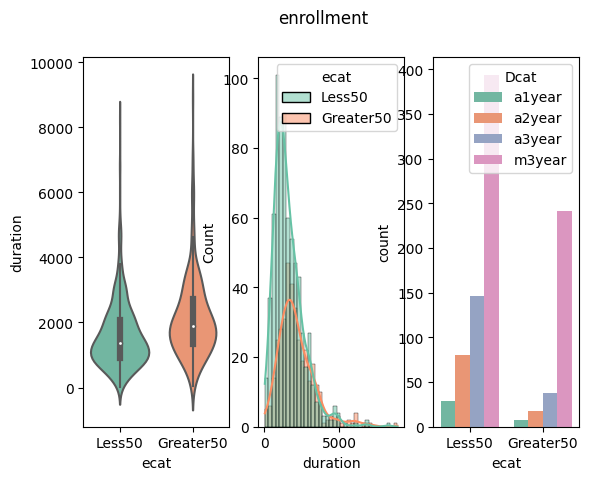

In [ ]:
fplot("ecat","enrollment")

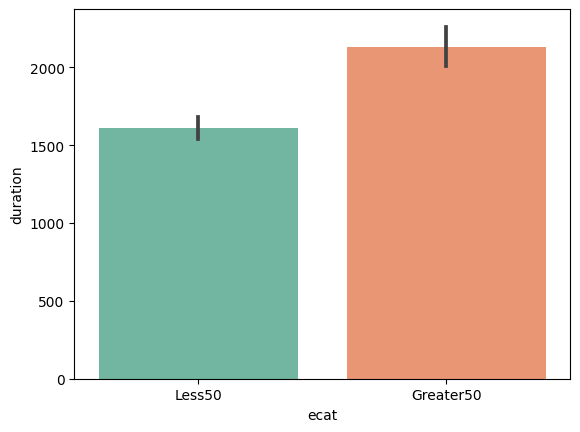

In [ ]:
fig=plt.figure()
ax=sns.barplot(x="ecat" , y="duration",palette="Set2", data=df1)
plt.show()

In [ ]:
import scipy.stats as stats

## Sponsor vs Duration
1. Industrial or Academic

Note: We only count industry solo, collaboration is counted in acdemics

In [ ]:
values=["university", "academic", "research" ,"hospital", "organization"]

In [ ]:
# Industry vs Academic
df1["indcat"]=np.where(df1["sponsor/collaborators"].str.contains('|'.join(values)),"CorA" ,"IndSolo")
dfa= df1[df1.indcat.isin(["N"])]
dfb=df1[df1.indcat.isin(["Y"])]

<ipython-input-45-4ae14a001bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["indcat"]=np.where(df1["sponsor/collaborators"].str.contains('|'.join(values)),"CorA" ,"IndSolo")


In [ ]:
df1.head()

,duration,gender,age,enrollment,sponsor/collaborators,indcat
0,1209.0,All,"18 Years and older (Adult, Older Adult)",4.0,eureka therapeutics inc.|peking university,CorA
1,1979.0,All,"18 Years and older (Adult, Older Adult)",26.0,alliance for clinical trials in oncology|natio...,IndSolo
2,1504.0,All,"18 Years and older (Adult, Older Adult)",26.0,incyte corporation,IndSolo
3,1204.0,All,"18 Years and older (Adult, Older Adult)",27.0,"beijing mabworks biotech co., ltd.",IndSolo
4,1824.0,All,"18 Years to 70 Years (Adult, Older Adult)",39.0,the lymphoma academic research organisation|ka...,CorA


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

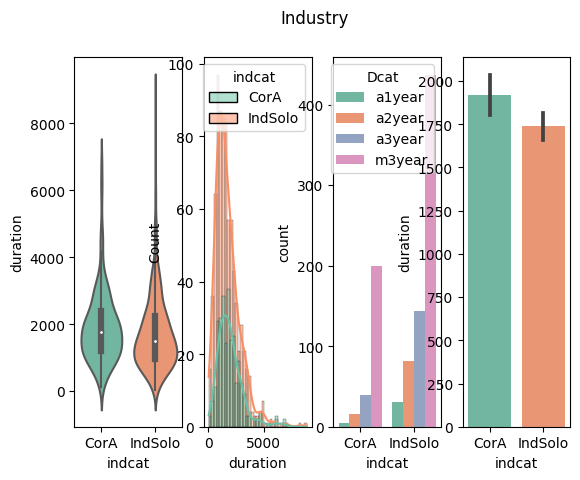

In [ ]:
fplot("indcat","Industry")

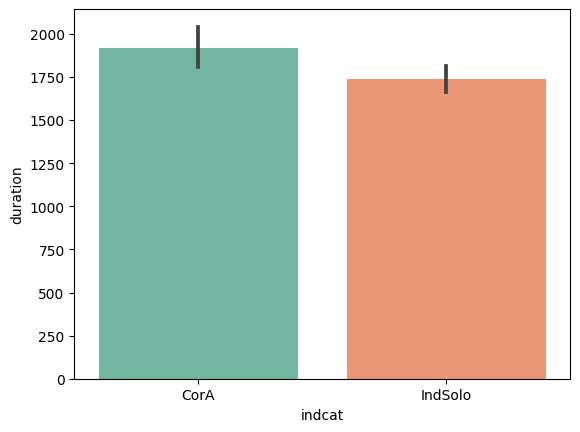

In [ ]:
fig=plt.figure()
ax=sns.barplot(x="indcat" , y="duration",palette="Set2", data=df1)
plt.show()

## Age
1. Any study contains Adult or children
2. Child solo

In [ ]:
# Adult vs Child Solo
df1["acat"]=np.where(df1["age"].str.contains("adult"),"CAdult" ,"ChildSolo")
df1.head()

<ipython-input-56-769cc83c8f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["acat"]=np.where(df1["age"].str.contains("adult"),"CAdult" ,"ChildSolo")


,duration,gender,age,enrollment,sponsor/collaborators,acat
0,1209.0,All,"18 years and older (adult, older adult)",4.0,eureka therapeutics inc.|peking university,CAdult
1,1979.0,All,"18 years and older (adult, older adult)",26.0,alliance for clinical trials in oncology|natio...,CAdult
2,1504.0,All,"18 years and older (adult, older adult)",26.0,incyte corporation,CAdult
3,1204.0,All,"18 years and older (adult, older adult)",27.0,"beijing mabworks biotech co., ltd.",CAdult
4,1824.0,All,"18 years to 70 years (adult, older adult)",39.0,the lymphoma academic research organisation|ka...,CAdult


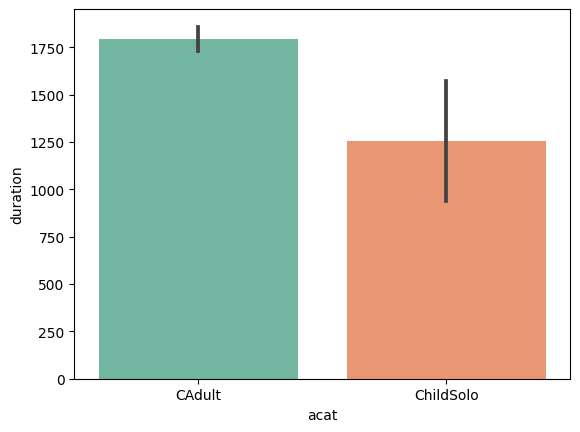

In [ ]:
fig=plt.figure()
ax=sns.barplot(x="acat" , y="duration",palette="Set2", data=df1)
plt.show()